# Complete code for PCA vs VIF comparison in recession prediction with regression tables

## Importing data and Packages 

,RPI,INDPRO,CE16OV,UNRATE,PAYEMS,USGOOD,USTPU,HOUST,PERMIT,DPCERA3M086SBEA,...,EXUSUK,WPSFD49207,WPSID61,CPIAUCSL,SP500,NASDAQ,GOLDBAR,Regime,P/E,Dividend Yield
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,...,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,13013.593713,97.289131,141985.040956,5.751195,135010.034130,21272.037543,25903.324232,1310.266212,1347.744027,93.758055,...,1.584792,168.443345,165.411604,207.518638,1511.782662,3321.856693,20.337996,0.102389,25.736664,1.856143
std,2223.541678,7.878725,7924.907540,1.871133,7686.218388,2154.261014,977.298103,437.494200,441.605980,15.384163,...,0.193636,27.052539,30.463240,31.276928,622.779500,2034.430021,9.546422,0.303678,16.294103,0.377863
min,8909.327000,74.684100,125125.000000,3.500000,118316.000000,17627.000000,23947.000000,478.000000,513.000000,63.691000,...,1.216000,129.700000,120.800000,154.700000,636.020020,1059.790039,6.012785,0.000000,13.007800,1.110000
25%,11319.255000,92.599300,137008.000000,4.400000,130580.000000,19505.000000,25216.000000,1002.000000,1044.000000,81.955000,...,1.452500,140.100000,130.000000,178.100000,1104.239990,1932.209961,13.264847,0.000000,18.269500,1.660000
50%,13027.964000,98.077900,141254.000000,5.100000,133250.000000,21681.000000,25829.000000,1330.000000,1366.000000,95.740000,...,1.582500,170.800000,172.300000,212.495000,1312.410034,2498.229980,16.925674,0.000000,22.018100,1.880000
75%,14539.284000,103.150400,146247.000000,6.200000,138324.000000,22876.000000,26558.000000,1629.000000,1656.000000,103.572000,...,1.662300,195.100000,195.500000,235.976000,1920.030029,4408.180176,25.159029,0.000000,26.750700,2.040000
max,19124.430000,110.551600,158803.000000,14.700000,152463.000000,24717.000000,27832.000000,2273.000000,2263.000000,121.894000,...,2.070100,207.800000,204.700000,259.050000,3230.780029,10058.769531,46.359047,1.000000,122.412800,3.600000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RPI              293 non-null    float64
 1   INDPRO           293 non-null    float64
 2   CE16OV           293 non-null    float64
 3   UNRATE           293 non-null    float64
 4   PAYEMS           293 non-null    float64
 5   USGOOD           293 non-null    float64
 6   USTPU            293 non-null    float64
 7   HOUST            293 non-null    float64
 8   PERMIT           293 non-null    float64
 9   DPCERA3M086SBEA  293 non-null    float64
 10  AMTMTI           293 non-null    float64
 11  AMTMNO           293 non-null    float64
 12  ACOGNO           293 non-null    float64
 13  AMDMUO           293 non-null    float64
 14  BUSINV           293 non-null    float64
 15  ISRATIO          293 non-null    float64
 16  M1SL             293 non-null    float64
 17  M2SL            

None

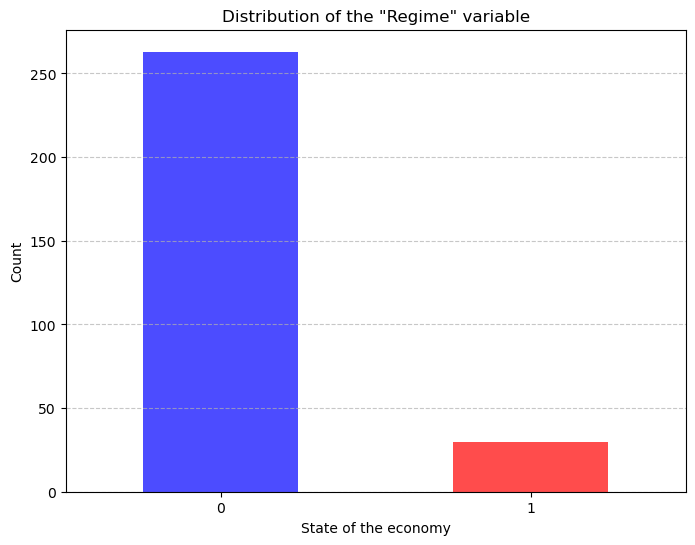

,RPI,INDPRO,CE16OV,UNRATE,PAYEMS,USGOOD,USTPU,HOUST,PERMIT,DPCERA3M086SBEA,...,EXCAUS,EXUSUK,WPSFD49207,WPSID61,CPIAUCSL,SP500,NASDAQ,GOLDBAR,P/E,Dividend Yield
0,8909.327,74.6841,125125.0,5.6,118316.0,23196.0,23947.0,1467.0,1387.0,63.691,...,1.3669,1.5288,129.7,125.5,154.7,636.020020,1059.790039,20.754421,18.6845,2.26
1,8983.863,75.8344,125639.0,5.5,118739.0,23280.0,23988.0,1491.0,1420.0,64.180,...,1.3752,1.5360,129.7,125.0,155.0,640.429993,1100.050049,21.372637,18.8140,2.16
2,9015.588,75.7631,125862.0,5.5,118993.0,23276.0,24030.0,1424.0,1437.0,64.491,...,1.3656,1.5271,130.5,125.3,155.5,645.500000,1101.400024,21.460953,18.9630,2.18
3,9039.466,76.4562,125994.0,5.6,119158.0,23316.0,24043.0,1516.0,1463.0,64.729,...,1.3592,1.5160,130.9,125.7,156.1,654.169983,1190.520020,21.637589,18.7388,2.19
4,9078.928,77.0161,126244.0,5.6,119486.0,23358.0,24137.0,1504.0,1457.0,64.813,...,1.3693,1.5152,130.9,126.2,156.4,669.119995,1243.430054,22.255806,19.1670,2.15


,RPI,INDPRO,CE16OV,UNRATE,PAYEMS,USGOOD,USTPU,HOUST,PERMIT,DPCERA3M086SBEA,...,EXCAUS,EXUSUK,WPSFD49207,WPSID61,CPIAUCSL,SP500,NASDAQ,GOLDBAR,P/E,Dividend Yield
0,-1.848982,-2.874032,-2.131115,-0.080942,-2.175660,0.894624,-2.005193,0.358866,0.089046,-1.957760,...,0.552970,-0.289655,-1.434602,-1.312398,-1.691630,-1.408622,-1.113794,0.043696,-0.433545,1.070619
1,-1.815403,-2.727781,-2.066145,-0.134477,-2.120532,0.933683,-1.963169,0.413818,0.163901,-1.925919,...,0.598451,-0.252408,-1.434602,-1.328839,-1.682022,-1.401529,-1.093971,0.108565,-0.425584,0.805520
2,-1.801111,-2.736846,-2.037958,-0.134477,-2.087429,0.931823,-1.920120,0.260411,0.202463,-1.905669,...,0.545847,-0.298450,-1.404979,-1.318974,-1.666009,-1.393374,-1.093307,0.117832,-0.416424,0.858540
3,-1.790354,-2.648725,-2.021273,-0.080942,-2.065926,0.950423,-1.906795,0.471059,0.261439,-1.890172,...,0.510777,-0.355872,-1.390168,-1.305821,-1.646792,-1.379429,-1.049426,0.136367,-0.430207,0.885050
4,-1.772576,-2.577538,-1.989673,-0.080942,-2.023179,0.969953,-1.810447,0.443584,0.247829,-1.884703,...,0.566121,-0.360010,-1.390168,-1.289380,-1.637184,-1.355382,-1.023374,0.201237,-0.403883,0.779010


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant
from scipy import stats
import os 

# Load and preprocess data (CHANGE DIRECTORY FOR REPLICATION)
df = pd.read_csv('/Users/rfernex/Documents/Education/SciencesPo/Courses/CSS/Projects/Financial_Recession_Project/Data/Raw_Data/macrodata.csv') # Change directory

# Remove index column and prepare target variable
df = df.drop("Unnamed: 0", axis=1)
df['Regime'] = df['Regime'].map({'Normal': 0, 'Recession': 1})

display(df.describe())
display(df.info())

# Visualization of the distribution of the "state of the economy" variable 
plt.figure(figsize=(8, 6))
df['Regime'].value_counts().plot(kind='bar', color=['blue', 'red'], alpha=0.7)
plt.title('Distribution of the "Regime" variable')
plt.xlabel('State of the economy')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Standardize features
X = df.drop('Regime', axis=1)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

display(X.head())
display(X_scaled.head())

# Define the specific output directory
output_dir = "/Users/rfernex/Documents/Education/SciencesPo/Courses/CSS/Projects/Financial_Recession_Project/Output"
os.makedirs(output_dir, exist_ok=True)

## Exploratory data analysis 

## PCA Approach

In [6]:
# Hardcodes which indicators are financial and which are not 
financial_cols = ['FEDFUNDS', 'TB3MS', 'TB6MS', 'GS1', 'GS5', 'GS10', 'AAA', 
                 'TB3SMFFM', 'T1YFFM', 'AAAFFM', 'SP500', 'NASDAQ', 'GOLDBAR', 'P/E', 'Dividend Yield']
non_financial_cols = [col for col in X.columns if col not in financial_cols]

# Apply PCA separately to financial and non-financial indicators
pca_financial = PCA(n_components=5)  # Using 5 components based on previous analysis
pca_non_financial = PCA(n_components=4)  # Using 4 components based on previous analysis

financial_pca = pd.DataFrame(
    pca_financial.fit_transform(X_scaled[financial_cols]),
    columns=[f'FIN_PC{i+1}' for i in range(5)]
)
non_financial_pca = pd.DataFrame(
    pca_non_financial.fit_transform(X_scaled[non_financial_cols]),
    columns=[f'NFIN_PC{i+1}' for i in range(4)]
)

# Combine PCA components
X_combined = pd.concat([financial_pca, non_financial_pca], axis=1)

# Split data for PCA approach
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, df['Regime'], train_size=0.6, random_state=0, stratify=df['Regime']
)

# Train weighted logistic regression (PCA approach)
model_pca = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
model_pca.fit(X_train, y_train)

# Calculate standard errors using the covariance matrix
cov_matrix = np.linalg.inv(np.dot(X_train.T, X_train))
coef_std = np.sqrt(np.diag(cov_matrix))

# Calculate p-values
z_scores = model_pca.coef_[0] / coef_std
p_values = 2 * (1 - stats.norm.cdf(abs(z_scores)))

# Calculate odds ratios and create DataFrame with metrics
odds_ratios = np.exp(model_pca.coef_[0])
results_pca_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': model_pca.coef_[0],
    'Std Error': coef_std,
    'p-value': p_values,
    'Odds Ratio': odds_ratios
})

print("\
PCA Logistic Regression Results:")
print(results_pca_df.to_markdown(index=False, floatfmt='.4f'))

# Export results to CSV
results_pca_df.to_csv(os.path.join(output_dir, "PCA_regression_results.csv"), index=False)



PCA Logistic Regression Results:
| Variable   |   Coefficient |   Std Error |   p-value |   Odds Ratio |
|:-----------|--------------:|------------:|----------:|-------------:|
| FIN_PC1    |       -0.3748 |      0.1659 |    0.0239 |       0.6875 |
| FIN_PC2    |       -0.7813 |      0.1852 |    0.0000 |       0.4578 |
| FIN_PC3    |       -1.3933 |      0.0901 |    0.0000 |       0.2483 |
| FIN_PC4    |        1.0821 |      0.1083 |    0.0000 |       2.9508 |
| FIN_PC5    |        0.6049 |      0.1151 |    0.0000 |       1.8311 |
| NFIN_PC1   |       -0.0146 |      0.1181 |    0.9017 |       0.9855 |
| NFIN_PC2   |       -0.6551 |      0.0993 |    0.0000 |       0.5194 |
| NFIN_PC3   |       -0.0913 |      0.0722 |    0.2060 |       0.9127 |
| NFIN_PC4   |        0.2680 |      0.1781 |    0.1323 |       1.3074 |


In [7]:
print(len(X_test))
print(len(X_train))

118
175


In [8]:
# Generate predictions for PCA approach
y_pred_prob = model_pca.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate ROC curve for PCA approach
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)

## VIF approach

In [10]:
# Function to calculate VIF scores
def calculate_vif(X):
    X_with_constant = add_constant(X)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_with_constant.columns
    vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) 
                       for i in range(X_with_constant.shape[1])]
    return vif_data

# Iterative VIF calculation and feature elimination with a more conservative threshold
X_vif = X_scaled.copy()
max_vif = float('inf')
iteration = 1

# Using a more conservative VIF threshold of 4
while max_vif > 4:
    vif_data = calculate_vif(X_vif)
    
    # Remove constant column from consideration
    vif_data_no_const = vif_data[vif_data['Variable'] != 'const']
    
    # Get maximum VIF value and corresponding variable
    max_vif = vif_data_no_const['VIF'].max()
    if max_vif > 4:
        variable_to_remove = vif_data_no_const.loc[vif_data_no_const['VIF'].idxmax(), 'Variable']
        #print(f"Removing {variable_to_remove} with VIF = {max_vif:.2f}")
        X_vif = X_vif.drop(columns=[variable_to_remove])
        iteration += 1

print("\
Final VIF scores:")
final_vif = calculate_vif(X_vif)
print(final_vif)

final_vif.to_csv(os.path.join(output_dir, "VIF_variables.csv"), index=False)

/Users/rfernex/Documents/Education/SciencesPo/Courses/CSS/Coding_Softwares/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/rfernex/Documents/Education/SciencesPo/Courses/CSS/Coding_Softwares/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Final VIF scores:
         Variable       VIF
0           const  1.000000
1          UNRATE  2.752493
2           HOUST  3.227608
3         ISRATIO  2.539421
4          T1YFFM  1.599237
5          AAAFFM  2.783558
6          EXUSUK  3.518797
7          NASDAQ  2.643204
8             P/E  1.655014
9  Dividend Yield  2.147862


In [11]:
# Split data for VIF approach
X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(
    X_vif, df['Regime'], train_size=0.6, random_state=0, stratify=df['Regime']
)

# Fit logistic regression using standard maximum likelihood
model_vif = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
results_vif = model_vif.fit(X_train_vif, y_train_vif)

# Calculate standard errors using the covariance matrix
cov_matrix = np.linalg.inv(np.dot(X_train_vif.T, X_train_vif))
coef_std = np.sqrt(np.diag(cov_matrix))

# Calculate p-values
z_scores = model_vif.coef_[0] / coef_std
p_values = 2 * (1 - stats.norm.cdf(abs(z_scores)))

# Calculate odds ratios and create DataFrame with metrics
odds_ratios = np.exp(model_pca.coef_[0])
results_vif_df = pd.DataFrame({
    'Variable': X_train_vif.columns,
    'Coefficient': model_vif.coef_[0],
    'Std Error': coef_std,
    'p-value': p_values,
    'Odds Ratio': odds_ratios
})

print("\
VIF Logistic Regression Results:")
print(results_vif_df.to_markdown(index=False, floatfmt='.4f'))

# Export results to CSV
results_vif_df.to_csv(os.path.join(output_dir, "VIF_regression_results.csv"), index=False)

VIF Logistic Regression Results:
| Variable       |   Coefficient |   Std Error |   p-value |   Odds Ratio |
|:---------------|--------------:|------------:|----------:|-------------:|
| UNRATE         |        0.1691 |      0.1069 |    0.1137 |       0.6875 |
| HOUST          |        0.3578 |      0.1305 |    0.0061 |       0.4578 |
| ISRATIO        |        0.9534 |      0.1110 |    0.0000 |       0.2483 |
| T1YFFM         |       -1.2093 |      0.0946 |    0.0000 |       2.9508 |
| AAAFFM         |        1.3715 |      0.1249 |    0.0000 |       1.8311 |
| EXUSUK         |        1.6687 |      0.1389 |    0.0000 |       0.9855 |
| NASDAQ         |        1.3867 |      0.1163 |    0.0000 |       0.5194 |
| P/E            |        0.8619 |      0.0885 |    0.0000 |       0.9127 |
| Dividend Yield |        0.7305 |      0.1029 |    0.0000 |       1.3074 |


In [12]:
# Generate predictions
y_pred_prob_vif = model_vif.predict_proba(X_test_vif)[:, 1]
y_pred_vif = (y_pred_prob_vif > 0.5).astype(int)

# Calculate ROC curve for VIF
fpr_vif, tpr_vif, _ = metrics.roc_curve(y_test_vif, y_pred_prob_vif)

## Comparing the two approaches 

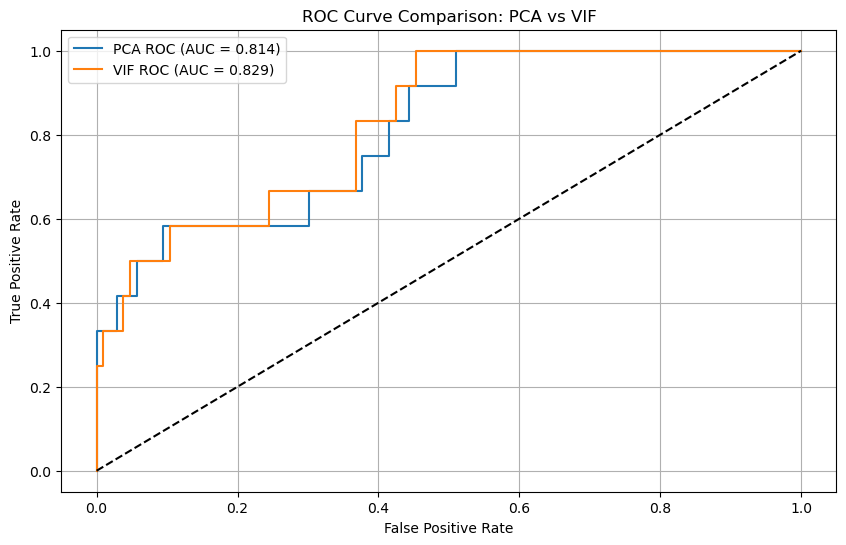

In [14]:
# Plot ROC curves for both approaches
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'PCA ROC (AUC = {metrics.auc(fpr, tpr):.3f})')
plt.plot(fpr_vif, tpr_vif, label=f'VIF ROC (AUC = {metrics.auc(fpr_vif, tpr_vif):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: PCA vs VIF')
plt.legend()
plt.grid(True)
plt.savefig('/Users/rfernex/Documents/Education/SciencesPo/Courses/CSS/Projects/Financial_Recession_Project/Output/ROC_curves.png') # Change directory
plt.show()


In [15]:
# Compute weighted metrics for PCA model
pca_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score'],
    'Score': [
        metrics.accuracy_score(y_test, y_pred),
        metrics.precision_score(y_test, y_pred, average='weighted'),
        metrics.recall_score(y_test, y_pred, average='weighted'),
        metrics.f1_score(y_test, y_pred, average='weighted'),
        roc_auc_score(y_test, model_pca.predict_proba(X_test)[:, 1])
    ]
})

# Compute weighted metrics for VIF model
vif_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score'],
    'Score': [
        metrics.accuracy_score(y_test_vif, y_pred_vif),
        metrics.precision_score(y_test_vif, y_pred_vif, average='weighted'),
        metrics.recall_score(y_test_vif, y_pred_vif, average='weighted'),
        metrics.f1_score(y_test_vif, y_pred_vif, average='weighted'),
        roc_auc_score(y_test_vif, model_vif.predict_proba(X_test_vif)[:, 1])
    ]
})

pca_metrics.to_csv(os.path.join(output_dir, "PCA_metrics.csv"), index=False)
vif_metrics.to_csv(os.path.join(output_dir, "VIF_metrics.csv"), index=False)

# Display tables
print("PCA Metrics:")
print(pca_metrics.to_string(index=False))
print("\
VIF Metrics:")
print(vif_metrics.to_string(index=False))

PCA Metrics:
   Metric    Score
 Accuracy 0.779661
Precision 0.873823
   Recall 0.779661
 F1 Score 0.814735
AUC Score 0.814465
VIF Metrics:
   Metric    Score
 Accuracy 0.864407
Precision 0.883599
   Recall 0.864407
 F1 Score 0.872788
AUC Score 0.828616


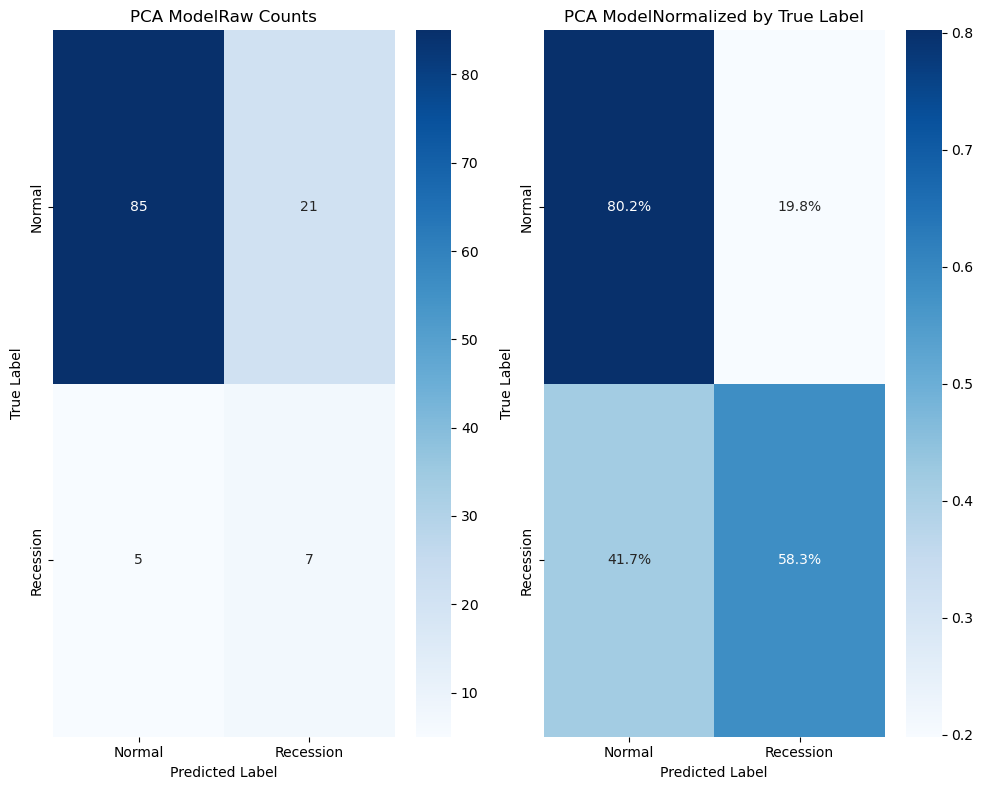

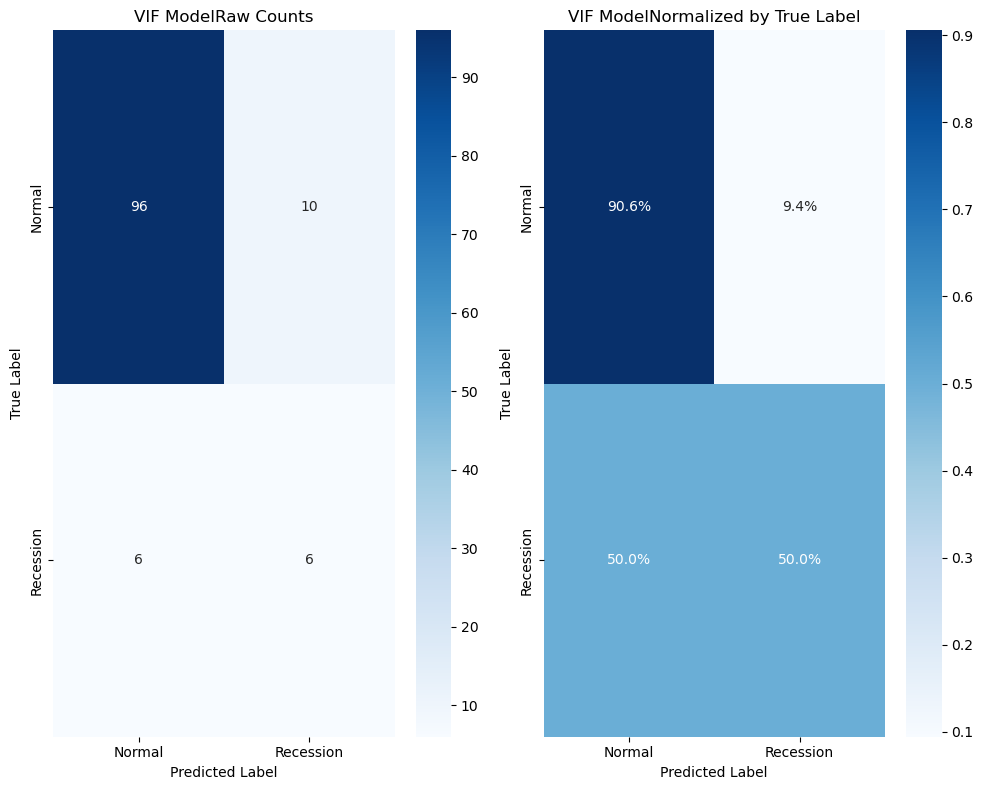

In [16]:

#creates confusion matrixes 
# Function to plot weighted confusion matrix
def plot_weighted_confusion_matrix(y_true, y_pred, title, filename):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate percentages for each class
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_normalized = np.nan_to_num(cm_normalized)  # Replace NaN with 0
    
    plt.figure(figsize=(10, 8))
    
    # Plot raw counts
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Recession'],
                yticklabels=['Normal', 'Recession'])
    plt.title(f'{title}\
Raw Counts')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # Plot percentages
    plt.subplot(1, 2, 2)
    sns.heatmap(cm_normalized, annot=True, fmt='.1%', cmap='Blues',
                xticklabels=['Normal', 'Recession'],
                yticklabels=['Normal', 'Recession'])
    plt.title(f'{title}\
Normalized by True Label')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, filename), 
        bbox_inches='tight',
        dpi=300,
        format='png')
    plt.show()

# Plot weighted confusion matrices for both models
plot_weighted_confusion_matrix(y_test, y_pred, 'PCA Model', 'pca_confusion_matrix.png')
plot_weighted_confusion_matrix(y_test_vif, y_pred_vif, 'VIF Model', 'vif_confusion_matrix.png')